<a href="https://colab.research.google.com/github/iam-fern/Generate_multiplication_4X/blob/main/GQtest_cluster_data(y_hat)_multi_delta_(_2_8)_n60_05.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import os
import statistics as stats
import scipy.stats as ss
import scipy.stats as st
from scipy.stats import f_oneway
from scipy import stats
import scipy.stats as stats
import time
import statsmodels.api as sm
from google.colab import drive
from statsmodels.formula.api import ols
from google.colab import files

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
base_path = '/content/drive/My Drive/pattern_multiplication_4X/multiplication_delta_-2.8'

In [4]:
# เรียกใช้ข้อมูลจากไฟล์ โดยผ่านฟังก์ชัน ที่ชื่อว่า read_csv
file_path = os.path.join(base_path, 'data_multi_delta_-2.8_n60.csv')

In [5]:
df = pd.read_csv(file_path)
df

,rep,index,x1,x2,x3,x4,e,Y,y_hat,e_hat
0,0.0,0.0,36.029253,64.221923,64.299842,63.931443,0.005440,238.487901,238.483512,0.004389
1,0.0,1.0,92.783433,75.130526,43.675692,60.604979,-0.002388,282.192241,282.195646,-0.003405
2,0.0,2.0,40.082090,80.484175,30.747433,36.158890,-0.000284,197.472304,197.473119,-0.000815
3,0.0,3.0,41.506849,94.056966,62.829794,99.802821,-0.001606,308.194825,308.196558,-0.001733
4,0.0,4.0,52.165930,48.833189,69.862333,28.659384,0.002686,209.523522,209.522116,0.001406
...,...,...,...,...,...,...,...,...,...,...
59995,999.0,55.0,52.059229,23.303020,60.526978,99.009228,0.012742,244.911197,244.898366,0.012831
59996,999.0,56.0,64.429284,84.977036,58.984197,20.867277,-0.000320,239.257473,239.257924,-0.000451
59997,999.0,57.0,96.522334,20.889281,91.194136,86.165635,-0.013127,304.758259,304.770399,-0.012140
59998,999.0,58.0,92.091278,35.643424,68.089639,91.741592,0.007693,297.573626,297.565142,0.008484


In [6]:
df = pd.read_csv(file_path, index_col=['rep', 'index'])
df

x1         x2         x3         x4         e           Y  \
rep   index                                                                     
0.0   0.0    36.029253  64.221923  64.299842  63.931443  0.005440  238.487901   
      1.0    92.783433  75.130526  43.675692  60.604979 -0.002388  282.192241   
      2.0    40.082090  80.484175  30.747433  36.158890 -0.000284  197.472304   
      3.0    41.506849  94.056966  62.829794  99.802821 -0.001606  308.194825   
      4.0    52.165930  48.833189  69.862333  28.659384  0.002686  209.523522   
...                ...        ...        ...        ...       ...         ...   
999.0 55.0   52.059229  23.303020  60.526978  99.009228  0.012742  244.911197   
      56.0   64.429284  84.977036  58.984197  20.867277 -0.000320  239.257473   
      57.0   96.522334  20.889281  91.194136  86.165635 -0.013127  304.758259   
      58.0   92.091278  35.643424  68.089639  91.741592  0.007693  297.573626   
      59.0   65.985784  62.358928  93.003625  66.406397  0.000159  297.754893   

                  y_hat     e_hat  
rep   index                        
0.0   0.0    238.483512  0.004389  
      1.0    282.195646 -0.003405  
      2.0    197.473119 -0.000815  
      3.0    308.196558 -0.001733  
      4.0    209.522116  0.001406  
...                 ...       ...  
999.0 55.0   244.898366  0.012831  
      56.0   239.257924 -0.000451  
      57.0   304.770399 -0.012140  
      58.0   297.565142  0.008484  
      59.0   297.755509 -0.000617  

[60000 rows x 8 columns]

In [7]:
# ลบข้อมูลที่มี missing values
table = df.dropna()
table

x1         x2         x3         x4         e           Y  \
rep   index                                                                     
0.0   0.0    36.029253  64.221923  64.299842  63.931443  0.005440  238.487901   
      1.0    92.783433  75.130526  43.675692  60.604979 -0.002388  282.192241   
      2.0    40.082090  80.484175  30.747433  36.158890 -0.000284  197.472304   
      3.0    41.506849  94.056966  62.829794  99.802821 -0.001606  308.194825   
      4.0    52.165930  48.833189  69.862333  28.659384  0.002686  209.523522   
...                ...        ...        ...        ...       ...         ...   
999.0 55.0   52.059229  23.303020  60.526978  99.009228  0.012742  244.911197   
      56.0   64.429284  84.977036  58.984197  20.867277 -0.000320  239.257473   
      57.0   96.522334  20.889281  91.194136  86.165635 -0.013127  304.758259   
      58.0   92.091278  35.643424  68.089639  91.741592  0.007693  297.573626   
      59.0   65.985784  62.358928  93.003625  66.406397  0.000159  297.754893   

                  y_hat     e_hat  
rep   index                        
0.0   0.0    238.483512  0.004389  
      1.0    282.195646 -0.003405  
      2.0    197.473119 -0.000815  
      3.0    308.196558 -0.001733  
      4.0    209.522116  0.001406  
...                 ...       ...  
999.0 55.0   244.898366  0.012831  
      56.0   239.257924 -0.000451  
      57.0   304.770399 -0.012140  
      58.0   297.565142  0.008484  
      59.0   297.755509 -0.000617  

[60000 rows x 8 columns]

In [8]:
table.reset_index(inplace=True)
table

,rep,index,x1,x2,x3,x4,e,Y,y_hat,e_hat
0,0.0,0.0,36.029253,64.221923,64.299842,63.931443,0.005440,238.487901,238.483512,0.004389
1,0.0,1.0,92.783433,75.130526,43.675692,60.604979,-0.002388,282.192241,282.195646,-0.003405
2,0.0,2.0,40.082090,80.484175,30.747433,36.158890,-0.000284,197.472304,197.473119,-0.000815
3,0.0,3.0,41.506849,94.056966,62.829794,99.802821,-0.001606,308.194825,308.196558,-0.001733
4,0.0,4.0,52.165930,48.833189,69.862333,28.659384,0.002686,209.523522,209.522116,0.001406
...,...,...,...,...,...,...,...,...,...,...
59995,999.0,55.0,52.059229,23.303020,60.526978,99.009228,0.012742,244.911197,244.898366,0.012831
59996,999.0,56.0,64.429284,84.977036,58.984197,20.867277,-0.000320,239.257473,239.257924,-0.000451
59997,999.0,57.0,96.522334,20.889281,91.194136,86.165635,-0.013127,304.758259,304.770399,-0.012140
59998,999.0,58.0,92.091278,35.643424,68.089639,91.741592,0.007693,297.573626,297.565142,0.008484


In [9]:
table.set_index(['rep', 'index'], inplace=True)

In [10]:
table

x1         x2         x3         x4         e           Y  \
rep   index                                                                     
0.0   0.0    36.029253  64.221923  64.299842  63.931443  0.005440  238.487901   
      1.0    92.783433  75.130526  43.675692  60.604979 -0.002388  282.192241   
      2.0    40.082090  80.484175  30.747433  36.158890 -0.000284  197.472304   
      3.0    41.506849  94.056966  62.829794  99.802821 -0.001606  308.194825   
      4.0    52.165930  48.833189  69.862333  28.659384  0.002686  209.523522   
...                ...        ...        ...        ...       ...         ...   
999.0 55.0   52.059229  23.303020  60.526978  99.009228  0.012742  244.911197   
      56.0   64.429284  84.977036  58.984197  20.867277 -0.000320  239.257473   
      57.0   96.522334  20.889281  91.194136  86.165635 -0.013127  304.758259   
      58.0   92.091278  35.643424  68.089639  91.741592  0.007693  297.573626   
      59.0   65.985784  62.358928  93.003625  66.406397  0.000159  297.754893   

                  y_hat     e_hat  
rep   index                        
0.0   0.0    238.483512  0.004389  
      1.0    282.195646 -0.003405  
      2.0    197.473119 -0.000815  
      3.0    308.196558 -0.001733  
      4.0    209.522116  0.001406  
...                 ...       ...  
999.0 55.0   244.898366  0.012831  
      56.0   239.257924 -0.000451  
      57.0   304.770399 -0.012140  
      58.0   297.565142  0.008484  
      59.0   297.755509 -0.000617  

[60000 rows x 8 columns]

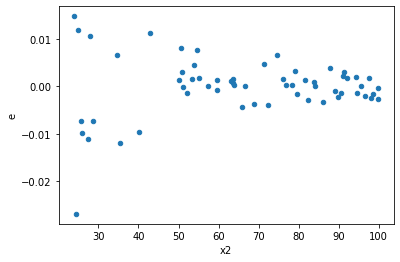

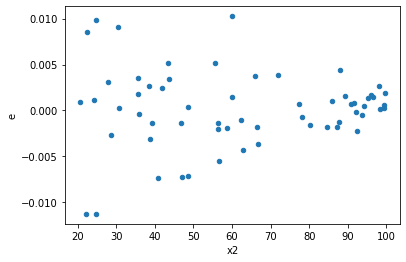

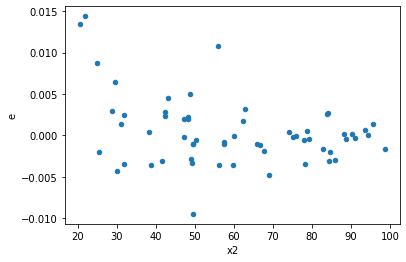

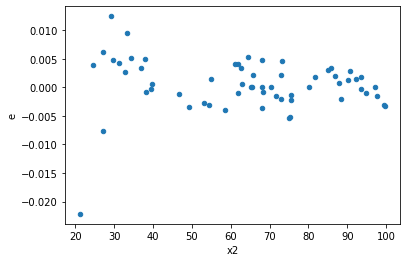

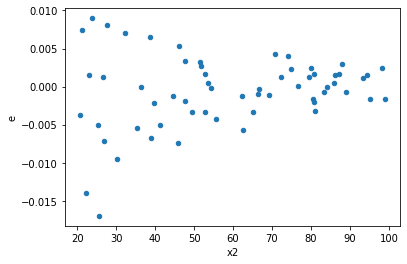

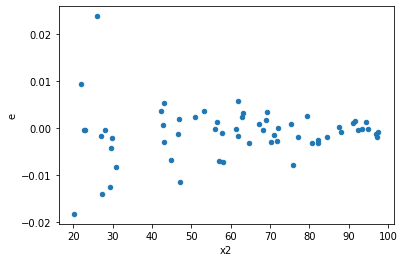

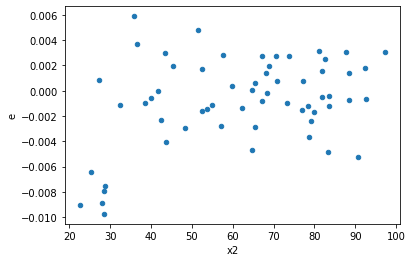

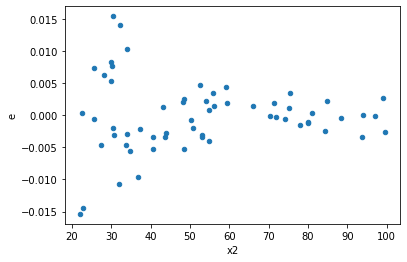

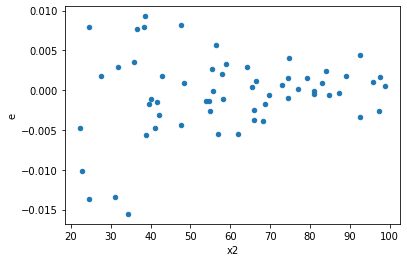

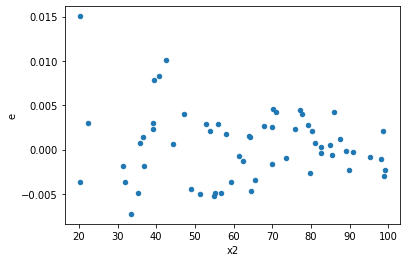

In [11]:
tablenew0 = table.loc[10.0]
tablenew1 = table.loc[11.0]
tablenew2 = table.loc[12.0]
tablenew3 = table.loc[13.0]
tablenew4 = table.loc[14.0]
tablenew5 = table.loc[15.0]
tablenew6 = table.loc[16.0]
tablenew7 = table.loc[17.0]
tablenew8 = table.loc[18.0]
tablenew9 = table.loc[19.0]
tablenew0.plot(x ='x2', y='e', kind = 'scatter')
tablenew1.plot(x ='x2', y='e', kind = 'scatter')
tablenew2.plot(x ='x2', y='e', kind = 'scatter')
tablenew3.plot(x ='x2', y='e', kind = 'scatter')
tablenew4.plot(x ='x2', y='e', kind = 'scatter')
tablenew5.plot(x ='x2', y='e', kind = 'scatter')
tablenew6.plot(x ='x2', y='e', kind = 'scatter')
tablenew7.plot(x ='x2', y='e', kind = 'scatter')
tablenew8.plot(x ='x2', y='e', kind = 'scatter')
tablenew9.plot(x ='x2', y='e', kind = 'scatter')

In [12]:
def get_result(run_replicate):
    new_table = table.loc[run_replicate]

    # show index
    new_table.reset_index(inplace=True)

    new_table.drop(['index'], axis=1, inplace=True)

    # แบ่งข้อมูลออกเป็น 2 กลุ่มด้วย k-mean

    #Set number of clusters
    x = new_table[["y_hat"]]

    #Another important parameter is init, which defines the method initialization to use (default='k-means++').
    #k-means++ algorithm uses the seeding technique for centroid initialization which is better than the random initialization method.
    kmeans = KMeans(n_clusters=2, init='k-means++', random_state=0).fit(x)

    #Generate cluster predictions and store in y_kmeans
    y_kmeans = kmeans.predict(x)

    #kmean_clusters.astype(float)
    kmean_clusters = pd.DataFrame({"clusters" : y_kmeans})

    # เชื่อมข้อมูลทั้ง 2 DataFrame เข้าด้วยกันด้วยคำสั่ง pd.concat
    data_clusters = pd.concat([new_table, kmean_clusters], axis=1)
    #data_clusters.reset_index(inplace=True)

    # กลุ่มที่ 1
    data_cluster0 = data_clusters[data_clusters.clusters == 0]

    y = data_cluster0[['Y']]
    x = data_cluster0[['x1', 'x2', 'x3', 'x4']]
    x = sm.add_constant(x)
    model1 = sm.OLS(y, x).fit()

    DF1 = model1.df_resid + 1
    SSE1 = model1.ssr
    MSE1 = SSE1/DF1

    # กลุ่มที่ 2
    data_cluster1 = data_clusters[data_clusters.clusters == 1]

    y = data_cluster1[['Y']]
    x = data_cluster1[['x1', 'x2', 'x3', 'x4']]
    x = sm.add_constant(x)
    model2 = sm.OLS(y, x).fit()

    DF2 = model2.df_resid + 1
    SSE2 = model2.ssr
    MSE2 = SSE2/DF2

    # คำนวณค่าสถิติ
    GQ_test_clusters = (SSE2/DF2) / (SSE1/DF1)

    df2 = DF2
    df1 = DF1

    # คำนวณค่า p-value
    # pdf(x, dfn, dfd, loc=0, scale=1) : Probability density function
    two_tailed = 2.0*(1.0-(ss.f.cdf(GQ_test_clusters, df1, df2)))
    p_greater = ss.f.cdf(GQ_test_clusters, df1, df2)
    p_less = 1.0-ss.f.cdf(GQ_test_clusters, df1, df2)

    return df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test_clusters, two_tailed, p_greater, p_less

# สร้าง list ของ replicates
list_replicate=list({i[0] for i in table.index})
list_replicate.sort()

# สร้าง list เพื่อเก็บค่า ทุกรอบที่ run
list_df1=[]
list_df2=[]
list_SSE1=[]
list_SSE2=[]
list_MSE1=[]
list_MSE2=[]
list_GQ_test_clusters=[]
list_result_test=[]
list_two_tailed=[]
list_p_greater=[]
list_p_less=[]
#list_result_test01=[]

# ใช้ for loop สำหรับการ run ทุก replicates
for run_replicate in list_replicate:
    df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test_clusters, two_tailed, p_greater, p_less=get_result(run_replicate)
    list_df1.append(df1)
    list_SSE1.append(SSE1)
    list_df2.append(df2)
    list_SSE2.append(SSE2)
    list_MSE1.append(MSE1)
    list_MSE2.append(MSE2)
    list_GQ_test_clusters.append(GQ_test_clusters)
    list_two_tailed.append(two_tailed)
    list_p_greater.append(p_greater)
    list_p_less.append(p_less)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future versi

In [13]:
# สร้างตารางผลลัพธ์
alpha = 0.05
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test_clusters":list_GQ_test_clusters, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)
result=result[(result["two_tailed"]<=1) & (result["greater"]<=1) & (result["less"]<=1)]
result["Result_test"]=result["two_tailed"].apply(lambda p_value: 'Reject005=0 : Heteroscedasticity' 
                                                 if p_value < alpha else 'Reject005=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")

result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test_clusters,two_tailed,greater,less,Result_test
Replicate,,,,,,,,,,,
0.0,23.0,29.0,0.00021605769661723508,0.0014307142944999683,9.393812896401525e-06,4.93349756724127e-05,5.251858453696835,4.4163798622376405e-05,0.9999779181006888,2.2081899311188202e-05,Reject005=0 : Heteroscedasticity
2.0,22.0,30.0,0.000578244345999447,0.0009683186640487001,2.6283833909065772e-05,3.227728880162333e-05,1.228028183152166,0.5925209876863433,0.7037395061568283,0.29626049384317166,Reject005=1 : Homoscedasticity
4.0,9.0,43.0,0.00013212392212834262,0.0009180677056886183,1.468043579203807e-05,2.1350411760200427e-05,1.4543445482578805,0.3919362569331881,0.8040318715334059,0.19596812846659406,Reject005=1 : Homoscedasticity
5.0,21.0,31.0,0.0002618859391691243,0.0010824111786373984,1.2470759008053539e-05,3.4916489633464466e-05,2.799868846067478,0.00916481898774446,0.9954175905061278,0.00458240949387223,Reject005=0 : Heteroscedasticity
6.0,25.0,27.0,0.00022492102983175937,0.0010877080601266157,8.996841193270374e-06,4.0285483708393175e-05,4.477736445823526,0.00024942092770374735,0.9998752895361481,0.00012471046385187368,Reject005=0 : Heteroscedasticity
7.0,35.0,17.0,0.0004052180313861846,0.0009531567328102847,1.1577658039605275e-05,5.606804310648734e-05,4.84277933539648,0.0010866683089409968,0.9994566658455295,0.0005433341544704984,Reject005=0 : Heteroscedasticity
14.0,21.0,31.0,0.00015267868241529593,0.0010121612455158825,7.270413448347425e-06,3.2650362758576854e-05,4.490853648219734,0.00017171098148294206,0.9999141445092585,8.585549074147103e-05,Reject005=0 : Heteroscedasticity
19.0,29.0,23.0,0.0002859275047551517,0.0005056071569635592,9.85956912948799e-06,2.1982919867980832e-05,2.229602488635567,0.052212299503567206,0.9738938502482164,0.026106149751783603,Reject005=1 : Homoscedasticity
21.0,28.0,24.0,0.0011859312948809065,0.001796542213544349,4.235468910288952e-05,7.485592556434788e-05,1.7673586360769924,0.16028311866868683,0.9198584406656566,0.08014155933434342,Reject005=1 : Homoscedasticity


In [14]:
# สร้างตารางผลลัพธ์
alpha = 0.05
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test_clusters":list_GQ_test_clusters, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)

result['two_tailed_new']=result[["two_tailed","greater","less"]].apply(lambda value: value[0] if value[0]<0.5 else (2*value[1] if value[1]<0.5 else 2*value[2]) , axis=1)
result["Result_test"]=result["two_tailed_new"].apply(lambda p_value: 'Reject005=0 : Heteroscedasticity' 
                                                     if p_value < alpha else 'Reject005=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")
result_show=result.drop(columns=["two_tailed", "greater", "less"])
result_show.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test_clusters,two_tailed_new,Result_test
Replicate,,,,,,,,,
0.0,23.0,29.0,0.00021605769661723508,0.0014307142944999683,9.393812896401525e-06,4.93349756724127e-05,5.251858453696835,4.4163798622376405e-05,Reject005=0 : Heteroscedasticity
1.0,18.0,34.0,0.0009969258461001562,0.00035880879181565,5.538476922778645e-05,1.0553199759283823e-05,0.19054335526578847,0.00047444949574907574,Reject005=0 : Heteroscedasticity
2.0,22.0,30.0,0.000578244345999447,0.0009683186640487001,2.6283833909065772e-05,3.227728880162333e-05,1.228028183152166,0.5925209876863433,Reject005=1 : Homoscedasticity
3.0,24.0,28.0,0.0007645377588060209,0.0003470542423035755,3.185573995025087e-05,1.2394794367984838e-05,0.38909139725970254,0.021537699974457362,Reject005=0 : Heteroscedasticity
4.0,9.0,43.0,0.00013212392212834262,0.0009180677056886183,1.468043579203807e-05,2.1350411760200427e-05,1.4543445482578805,0.3919362569331881,Reject005=1 : Homoscedasticity
5.0,21.0,31.0,0.0002618859391691243,0.0010824111786373984,1.2470759008053539e-05,3.4916489633464466e-05,2.799868846067478,0.00916481898774446,Reject005=0 : Heteroscedasticity
6.0,25.0,27.0,0.00022492102983175937,0.0010877080601266157,8.996841193270374e-06,4.0285483708393175e-05,4.477736445823526,0.00024942092770374735,Reject005=0 : Heteroscedasticity
7.0,35.0,17.0,0.0004052180313861846,0.0009531567328102847,1.1577658039605275e-05,5.606804310648734e-05,4.84277933539648,0.0010866683089409968,Reject005=0 : Heteroscedasticity
8.0,33.0,19.0,0.0009611832727569935,0.0004457834113954052,2.9126765841121018e-05,2.3462284810284484e-05,0.8055231719946246,0.57060635336434,Reject005=1 : Homoscedasticity


In [15]:
result_show['Result_test'].value_counts()

Reject005=0 : Heteroscedasticity    626
Reject005=1 : Homoscedasticity      374
Name: Result_test, dtype: int64